# Analytics of NYE2019 playtraces - 1k playtraces

In [1]:
from collections import Counter
import json
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = 'beauty_pageant/Social Anxiety Simulator 2019/random_test_outputs_2/'

In [21]:
all_qualities = {}
all_scene_counts = {}

quality_files = {}
scene_counts_files = {}
file_is_loop = {}
for fn in os.listdir(data_path):
    if 'scenes' in fn:
        try:
            scenes_data = np.loadtxt(data_path+fn, dtype=str)
        except:
            continue
        scenes_counter = Counter(scenes_data)
        scene_counts_files[fn.split('.')[0]] = scenes_counter
        for scene, count in scenes_counter.items():
            if scene in all_scene_counts:
                all_scene_counts[scene].append(count)
            else:
                all_scene_counts[scene] = [count]
        # TODO: loop check
        is_loop = True
        prev_scene = scenes_data[-10]
        for scene in scenes_data[-10:]:
            if scene != prev_scene:
                is_loop = False
                break
        file_is_loop[fn.split('.')[0]] = is_loop
    else:
        #try:
        with open(data_path + fn) as f:
            json_data = json.load(f)
        #except:
        #    continue
        for k, v in json_data['qualities'].items():
            if k in all_qualities:
                all_qualities[k].append(v)
            else:
                all_qualities[k] = [v]
        quality_files[fn.split('.')[0]] = json_data['qualities']

In [22]:
n_runs = len(scene_counts_files)
n_qualities = len(quality_files)

In [23]:
for k, v in all_qualities.items():
    if len(v) < n_qualities:
        v += [0]*(n_qualities - len(v))
for k, v in all_scene_counts.items():
    if len(v) < n_runs:
        v += [0]*(n_runs - len(v))

In [24]:
qualities_df = pd.DataFrame(quality_files).T
scenes_df = pd.DataFrame(scene_counts_files).T

In [25]:
scenes_df.to_csv('nye2019_scene_counts.csv')
qualities_df.to_csv('nye2019_qualities.csv')

In [26]:
scene_averages = Counter({k: np.mean(v) for k, v in all_scene_counts.items()})


In [27]:
scene_averages.most_common()[-1]

('em_final.hypothetical_yes', 0.001)

In [28]:
all_qualities.keys()

dict_keys(['recalculated_stats', 'cold', 'first_name', 'time', 'courage', 'energy', 'despair', 'minus_despair', 'hunger', 'thirst', 'bathroom_need', 'p1_time', 'p2_time', 'initialized', 'p3_time', 'anxiety', 'display_hours', 'display_minutes', 'phase_2_start', 'mood', 'mood2', 'phase', 'intro_flag', 'wander_count', 'wander_p1_w4_seen', 'tv_prog', 'greet_kevin', 'kevin_int', 'wander_p1_w3_seen', 'food_seen', 'snack_consumption_count', 'em_seen', 'em_int', 'prev_em', 'em_how_are_you', 'aub_int', 'aubrey_relationship', 'aub_seen', 'prev_aub', 'food_left', 'food', 'food_descs', 'food_eating', 'food_additional', 'food_consumption', 'food_remaining', 'food_item', 'food_desc', 'food_add', 'food_eat', 'miri_seen', 'prev_miri', 'em_dinner_intro_seen', 'miri_em', 'topic_weather', 'topic_food', 'talk_count', 'topic_hs', 'topic_college', 'topic_em', 'topic_politics', 'topic_media', 'hs_callback', 'is_alone', 'segue', 'has_loneliness_segue', 'has_mom_segue', 'has_imagine_segue', 'has_imagine', 'mov

In [29]:
sum(all_qualities['achievement_ending_emily_2'])

98

In [30]:
sum(all_qualities['achievement_ending_emily_1'])

82

In [31]:
sum(all_qualities['achievement_ending_alone_1'])

628

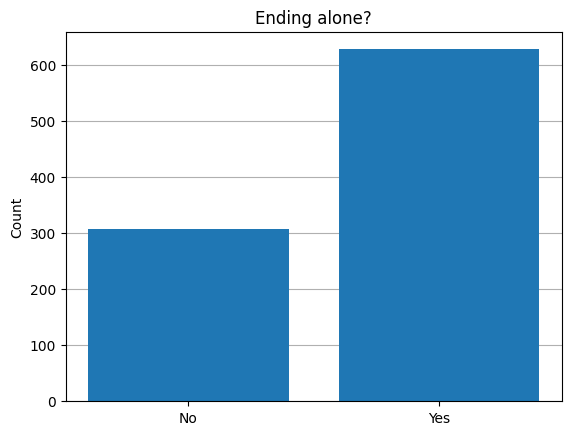

In [32]:
labels, counts = np.unique(all_qualities['achievement_ending_alone_1'], return_counts=True)
plt.bar(['No', 'Yes'], counts, align='center')
plt.gca().set_xticks(labels)
plt.grid(axis='y', zorder=0)
plt.gca().set_axisbelow(True)
plt.title('Ending alone?')
plt.ylabel('Count')
plt.show()

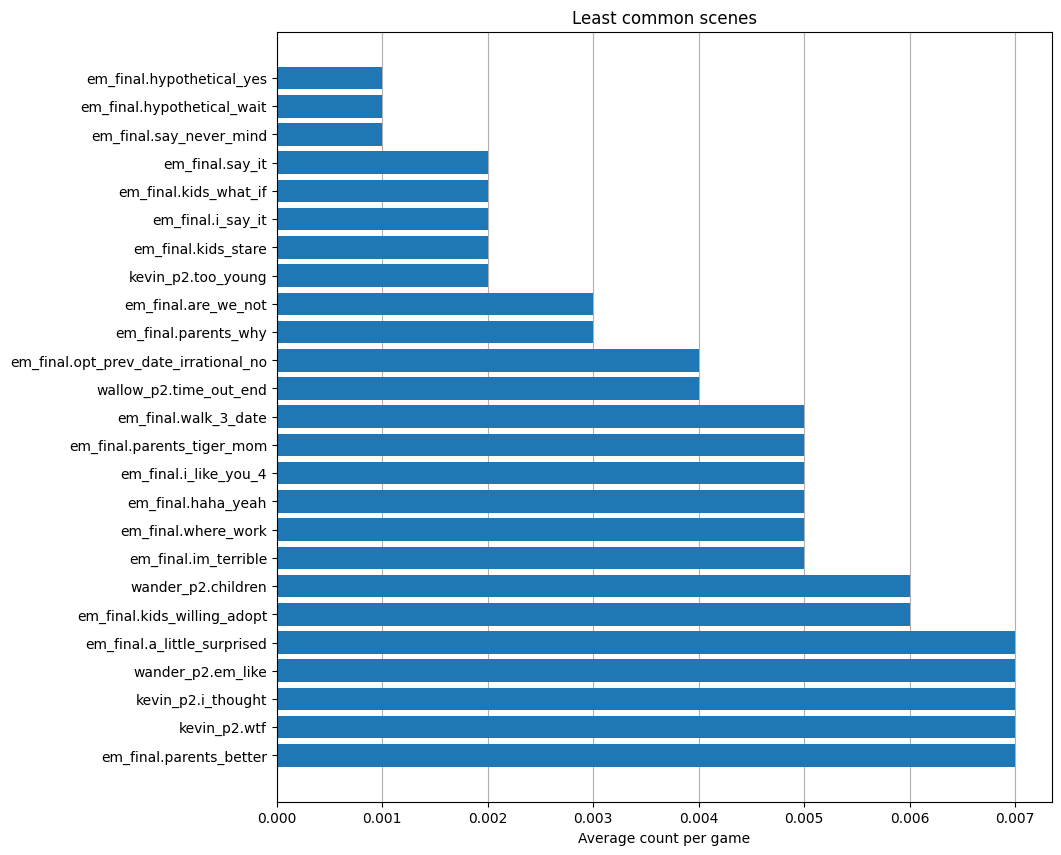

In [33]:
least_common = Counter(scene_averages).most_common()[-25:]
plt.subplots(figsize=(10, 10))
plt.grid(axis='x', zorder=0)
plt.gca().set_axisbelow(True)
plt.barh([x[0] for x in least_common], [x[1] for x in least_common])
plt.xlabel('Average count per game')
plt.title('Least common scenes')
plt.show()

In [34]:
loop_scenes = [s for s, k in file_is_loop.items() if k]

In [35]:
len(loop_scenes)

80

In [36]:
loop_scenes

['scenes_844',
 'scenes_40',
 'scenes_341',
 'scenes_633',
 'scenes_678',
 'scenes_458',
 'scenes_669',
 'scenes_243',
 'scenes_788',
 'scenes_645',
 'scenes_64',
 'scenes_221',
 'scenes_963',
 'scenes_944',
 'scenes_397',
 'scenes_554',
 'scenes_131',
 'scenes_814',
 'scenes_366',
 'scenes_812',
 'scenes_246',
 'scenes_466',
 'scenes_553',
 'scenes_488',
 'scenes_739',
 'scenes_947',
 'scenes_929',
 'scenes_3',
 'scenes_667',
 'scenes_495',
 'scenes_650',
 'scenes_490',
 'scenes_615',
 'scenes_429',
 'scenes_42',
 'scenes_600',
 'scenes_991',
 'scenes_948',
 'scenes_520',
 'scenes_289',
 'scenes_817',
 'scenes_674',
 'scenes_74',
 'scenes_65',
 'scenes_216',
 'scenes_733',
 'scenes_566',
 'scenes_855',
 'scenes_957',
 'scenes_795',
 'scenes_938',
 'scenes_274',
 'scenes_659',
 'scenes_446',
 'scenes_238',
 'scenes_304',
 'scenes_102',
 'scenes_524',
 'scenes_578',
 'scenes_619',
 'scenes_199',
 'scenes_954',
 'scenes_568',
 'scenes_753',
 'scenes_45',
 'scenes_706',
 'scenes_823',
 's

In [37]:
scenes_data = np.loadtxt(data_path+'scenes_42.txt', dtype=str)

In [38]:
scenes_data

array(['init', 'root.start', 'one', 'one.back_up', 'one.lesbian',
       'one.by_the_way', 'one.stand', 'one.optimizing', 'root.start',
       'mom_p1.stand', 'mom_p1.grad', 'mom_p1.converse', 'mom_p1.wish',
       'root.start', 'food_p1.food_choices', 'food_p1.drinks',
       'root.start', 'em_see_p1', 'em_set_prev', 'em_set_prev.emily_date',
       'em_see_p1.em_talk', 'em_see_p1.stand', 'em_see_p1.stand_silence',
       'em_see_p1.leave_emily', 'root.start', 'wander_p1', 'root.start',
       'food_p1.food_choices', 'root.start', 'phone_p1.options',
       'phone_p1.text', 'phone_p1.games', 'phone_p1.game_opts',
       'phone_p1.options', 'root.start', 'food_p1.food_choices',
       'root.start', 'phone_p1.options', 'phone_p1.media',
       'phone_p1.options', 'phone_p1.papers', 'root.start', 'wander_p1',
       'root.start', 'kevin_p1', 'kevin_p1.stand', 'root.start',
       'wander_p1', 'root.start', 'food_p1.food_choices',
       'food_p1.drinks', 'food_p1.alcoholic_beverages', 'f

In [39]:
scenes_data = np.loadtxt(data_path+'scenes_3.txt', dtype=str)

In [40]:
scenes_data

array(['init', 'credits', 'credits.inspirations', 'root.start', 'one',
       'one.back_up', 'one.name_wrong', 'one.lesbian', 'one.by_the_way',
       'one.stand', 'one.optimizing', 'root.start', 'phone_p1.options',
       'root.start', 'phone_p1.options', 'root.start', 'phone_p1.options',
       'phone_p1.wiki_1', 'root.start', 'food_p1.food_choices',
       'root.start', 'wander_p1', 'root.start', 'phone_p1.options',
       'phone_p1.wiki_3', 'root.start', 'kevin_p1', 'kevin_p1.tv',
       'root.start', 'mom_p1.stand', 'mom_p1.grad', 'mom_p1.converse',
       'mom_p1.wish', 'root.start', 'food_p1.food_choices',
       'food_p1.snack_choice', 'food_p1.snack_choices_end',
       'food_p1.drinks', 'root.start', 'food_p1.food_choices',
       'food_p1.snack_choice', 'food_p1.snack_choices_end',
       'food_p1.drinks', 'root.start', 'phone_p1.options',
       'phone_p1.games', 'phone_p1.game_opts', 'root.start',
       'food_p1.food_choices', 'food_p1.snack_choice',
       'food_p1.snack